In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import (
    calculate_wpv,
    calculate_wpv_uncertainty,
    calculate_bpv,
    calculate_bpv_uncertainty,
    propagate_error_ratio,
    hematology_abbreviation,
    blood_parameters,
)

c:\Users\zita.zarandy\AppData\Local\anaconda3\envs\data\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
clinical_lab = pd.read_parquet(
    "../data/synthetic_data_1000subjects_5visits_blood_tests.parquet"
)

In [4]:
wpv = calculate_wpv(clinical_lab, blood_parameters)
bpv = calculate_bpv(clinical_lab, blood_parameters)
wpv_err = calculate_wpv_uncertainty(clinical_lab, blood_parameters)
bpv_err = calculate_bpv_uncertainty(clinical_lab, blood_parameters)
ii, ii_err = propagate_error_ratio(wpv, bpv, wpv_err, bpv_err)

In [5]:
directory_to_save = "outputs"
os.makedirs(directory_to_save, exist_ok=True)

In [6]:
def bar_plot_with_error(variabilities, error, type, ylim=1.49, title="", name="II"):
    variabilities = variabilities.sort_values(ascending=False)
    for key, value in hematology_abbreviation.items():
        variabilities.index = variabilities.index.str.replace(key, value, regex=False)
    index = variabilities.index

    _, ax = plt.subplots(figsize=(10, 3))

    ax.bar(
        index,
        variabilities,
        color="firebrick",
        edgecolor="black",
        yerr=error,
        capsize=5,
        alpha=0.7,
    )

    ax.set_ylabel(type, fontsize=20)
    ax.set_xlabel("")
    ax.set_ylim(0, ylim)
    ax.set_xticks(range(len(index)))
    ax.set_xticklabels(index, rotation=90, fontsize=14, ha="center", va="top")
    ax.tick_params(axis="y", labelsize=12)

    ax.yaxis.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
    plt.suptitle(title, fontsize=20)
    plt.savefig(
        f"{directory_to_save}/{name}_blood_params.pdf",
        bbox_inches="tight",
        pad_inches=0,
    )

    plt.show()

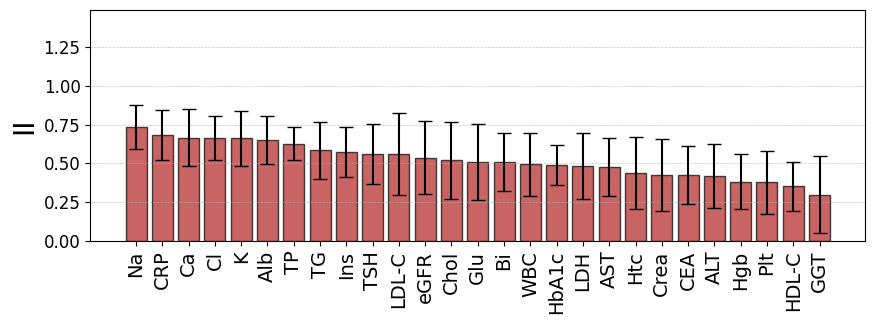

In [7]:
bar_plot_with_error(ii, ii_err, r"II")

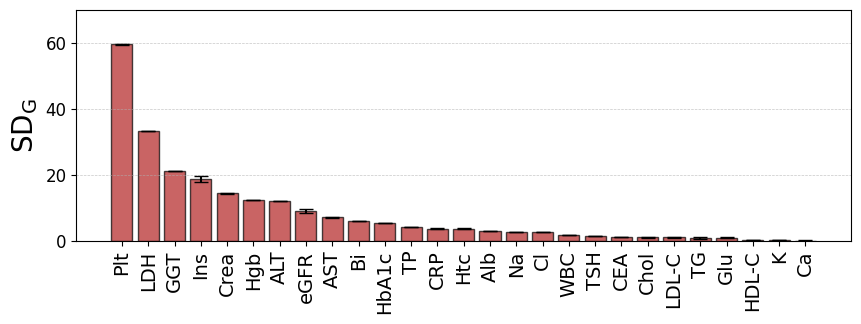

In [10]:
bar_plot_with_error(bpv, bpv_err, r"SD$_{\mathrm{G}}$", 70, name="SD_G")

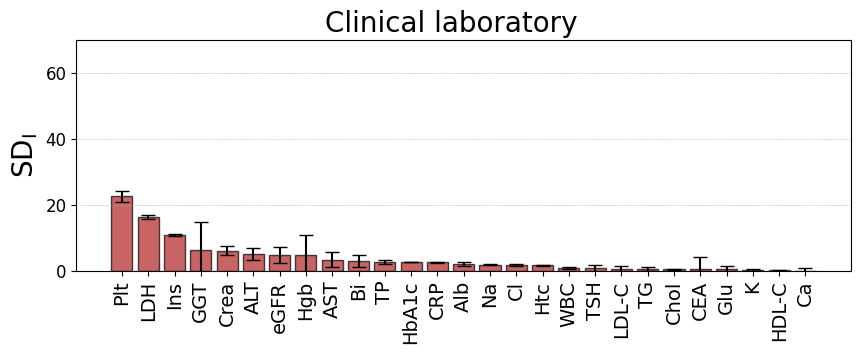

(None,)

In [12]:
bar_plot_with_error(
    wpv, wpv_err, r"SD$_{\mathrm{I}}$", 70, title="Clinical laboratory", name="SD_I"
),